In [28]:
import pandas as pd
import numpy as np
from collections import defaultdict
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [29]:
# census_1880 = pd.read_csv("data/census_1880_mn_v04.csv")
census_1850 = pd.read_csv("data/census_1850_indexUpdate.csv")
census_1880 = pd.read_csv("data/census_1880_mn_v04.csv")#select columns to use

In [49]:
#select columns to use
print(census_1880.columns)
print(census_1850.columns)

Index(['OBJECTID.x', 'CENSUS_MERGEID', 'CENSUS_SERIALB', 'CENSUS_SERIAL',
       'CENSUS_PERNUM', 'CENSUS_RECIDUS', 'CENSUS_REEL', 'CENSUS_VOLUME',
       'CENSUS_PAGENUM', 'CENSUS_NAMEFRSTB', 'CENSUS_NAMELASTB',
       'CENSUS_RELATE', 'CENSUS_RELATE_STR', 'CENSUS_AGE', 'CENSUS_SEXB',
       'CENSUS_RACENAMEB', 'CENSUS_RACEB', 'CENSUS_NPERHHB',
       'CENSUS_OCCLABELB', 'CENSUS_SEIUSBN', 'CENSUS_MATCH_ADDR',
       'CENSUS_HOUSE_NUMB', 'CENSUS_STREETB', 'CENSUS_TYPEB',
       'CENSUS_SEGMENT_ID', 'CENSUS_BUILDING_I', 'CENSUS_NEIGHBOR_1',
       'CENSUS_NEIGHBOR_2', 'CENSUS_SEGGROUP_I', 'CENSUS_EXTGROUP_I',
       'CENSUS_CITY', 'CENSUS_COUNTYUS', 'CENSUS_X', 'CENSUS_Y',
       'CENSUS_ADDRESS', 'CENSUS_ENUMDIST', 'CENSUS_CITYNAME',
       'CENSUS_STATENAME', 'CENSUS_UNITTYPE', 'MERGE_SRC', 'WARD_NUM',
       'CENSUS_AD'],
      dtype='object')
Index(['CENSUS_SERIALP', 'CENSUS_AGE', 'CENSUS_SEX', 'CENSUS_MARST',
       'CENSUS_RACE', 'CENSUS_LABFORCE', 'CENSUS_IMPREL', 'CENSUS_OCCSTR'

#### Let's investigate what the feature options are, and their distributions

In [11]:
display(census_1880.iloc[1000:1005, 0:20])
display(census_1850.iloc[1000:1005, 0:20])

,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
1000,1001,461012178MARYDALLAS,6348126,0,5,01254866-1-0011-1011-$,866,1,11,MARY,DALLAS,1200,Other non-relatives,21,2,white,100,8,DOMESTIC SERVANT,7
1001,1002,461012588WILLIAMDEVANNON,6348126,0,6,01254866-1-0011-1012-$,866,1,11,WILLIAM,DEVANNON,1200,Other non-relatives,25,1,white,100,8,LABORER,8
1002,1003,461013078KATENAILE,6348126,0,4,01254866-1-0011-1010-$,866,1,11,KATE,NAILE,1200,Other non-relatives,30,2,white,100,8,DOMESTIC SERVANT,7
1003,1004,4610133158THOMASLOCKE,6348126,0,8,01254866-1-0011-1014-$,866,1,11,THOMAS,LOCKE,1200,Other non-relatives,33,1,white,100,8,TRUCKMAN,15
1004,1005,461014008MARYFLYNN,6348126,0,2,01254866-1-0011-1008-$,866,1,11,MARY,FLYNN,201,Spouse,40,2,white,100,8,KEEPING HOUSE,0


,CENSUS_SERIALP,CENSUS_AGE,CENSUS_SEX,CENSUS_MARST,CENSUS_RACE,CENSUS_LABFORCE,CENSUS_IMPREL,CENSUS_OCCSTR,CENSUS_NAMELAST,CENSUS_NAMEFRST,CENSUS_SEQ_NUM,CENSUS_HH_NUM,CENSUS_IPUMS_UID,CENSUS_CITY,CENSUS_PAGENO_HOUSEHOLD,CENSUS_WARD_NUM,CENSUS_REEL_HOUSEHOLD,CENSUS_PLACE,CENSUS_DWELLING_NUM,CENSUS_DWELLING_SEQ
1000,2044527,4,1,6,120,0,3,NaN,CLOSTER,WILLIAM,3,402263,b1593c09-af51-4473-b705-94331e67430b,4610,300,1,534,MANHATTAN,77.0,178.0
1001,2044527,36,2,6,120,0,7,NaN,HANDS,MARY A,4,402264,51df0c5c-66d7-44da-86f4-8fd9af3bf8bb,4610,300,1,534,MANHATTAN,77.0,178.0
1002,2044527,16,1,6,120,2,8,LABORER,HANDS,MATTHEW,5,402264,5c1fca54-0516-45e7-b32f-0ab680f1110c,4610,300,1,534,MANHATTAN,77.0,178.0
1003,2044527,14,1,6,120,0,8,NaN,HANDS,WILLIAM,6,402264,541d1370-9db9-4699-89ab-10ad2aa89428,4610,300,1,534,MANHATTAN,77.0,178.0
1004,2044527,6,1,6,120,0,10,NaN,HANDS,JOHN,7,402264,fcaa5f6d-163d-4503-967c-b2b20af33489,4610,300,1,534,MANHATTAN,77.0,178.0


In [26]:
display(census_1880.iloc[2010:2015, 20:])
display(census_1850.iloc[1000:1005, 20:])

,CENSUS_MATCH_ADDR,CENSUS_HOUSE_NUMB,CENSUS_STREETB,CENSUS_TYPEB,CENSUS_SEGMENT_ID,CENSUS_BUILDING_I,CENSUS_NEIGHBOR_1,CENSUS_NEIGHBOR_2,CENSUS_SEGGROUP_I,CENSUS_EXTGROUP_I,...,CENSUS_X,CENSUS_Y,CENSUS_ADDRESS,CENSUS_ENUMDIST,CENSUS_CITYNAME,CENSUS_STATENAME,CENSUS_UNITTYPE,MERGE_SRC,WARD_NUM,CENSUS_AD
2010,"53 PIER 2, NYC-Manhattan, NY",0,53,Pie,6,6,57244,57248,57242,458,...,-74.012154,40.701328,53 PIER 2,1,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,1.0,1.0
2011,"53 PIER 2, NYC-Manhattan, NY",0,53,Pie,6,6,57244,57248,57242,458,...,-74.012154,40.701328,53 PIER 2,1,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,1.0,1.0
2012,"53 PIER 2, NYC-Manhattan, NY",0,53,Pie,6,6,57244,57248,57242,458,...,-74.012154,40.701328,53 PIER 2,1,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,1.0,1.0
2013,"53 PIER 2, NYC-Manhattan, NY",0,53,Pie,6,6,57244,57248,57242,458,...,-74.012154,40.701328,53 PIER 2,1,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,1.0,1.0
2014,"76 PIER 2, NYC-Manhattan, NY",0,76,Pie,6,6,57249,57250,57247,458,...,-74.012252,40.701184,76 PIER 2,1,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,1.0,1.0


,CENSUS_DWELLING_SIZE,CENSUS_GEOG,CENSUS_LINE,CENSUS_INDEX
1000,9,NEW YORK WARD 1 EASTERN DIVISION,340,1001
1001,9,NEW YORK WARD 1 EASTERN DIVISION,340,1002
1002,9,NEW YORK WARD 1 EASTERN DIVISION,340,1003
1003,9,NEW YORK WARD 1 EASTERN DIVISION,340,1004
1004,9,NEW YORK WARD 1 EASTERN DIVISION,340,1005


In [25]:
print(census_1880.nunique())
print(census_1850.nunique())

OBJECTID.x           1117479
CENSUS_MERGEID       1116647
CENSUS_SERIALB        226654
CENSUS_SERIAL         224477
CENSUS_PERNUM           1883
CENSUS_RECIDUS       1116326
CENSUS_REEL               35
CENSUS_VOLUME              3
CENSUS_PAGENUM           710
CENSUS_NAMEFRSTB       49021
CENSUS_NAMELASTB      107918
CENSUS_RELATE             49
CENSUS_RELATE_STR         49
CENSUS_AGE               109
CENSUS_SEXB                3
CENSUS_RACENAMEB           6
CENSUS_RACEB               7
CENSUS_NPERHHB           164
CENSUS_OCCLABELB       29538
CENSUS_SEIUSBN            79
CENSUS_MATCH_ADDR      57988
CENSUS_HOUSE_NUMB        186
CENSUS_STREETB          3169
CENSUS_TYPEB             358
CENSUS_SEGMENT_ID       4281
CENSUS_BUILDING_I       4307
CENSUS_NEIGHBOR_1      58571
CENSUS_NEIGHBOR_2      51081
CENSUS_SEGGROUP_I      51465
CENSUS_EXTGROUP_I        765
CENSUS_CITY                2
CENSUS_COUNTYUS            2
CENSUS_X               37684
CENSUS_Y               42246
CENSUS_ADDRESS

In [21]:
#Investigate CENSUS_SERIAL versus CENSUS_SERIALB
for id, group in census_1880.groupby("CENSUS_SERIAL"):
    if group["CENSUS_SERIALB"].nunique() > 1:
        display(group)

,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,...,CENSUS_X,CENSUS_Y,CENSUS_ADDRESS,CENSUS_ENUMDIST,CENSUS_CITYNAME,CENSUS_STATENAME,CENSUS_UNITTYPE,MERGE_SRC,WARD_NUM,CENSUS_AD
6,7,4610121181JAMES E.---,6347939,0,1,01254866-1-0001-0007-$,866,1,1,JAMES E.,...,-74.016451,40.690645,43 GOVERNORS ISLAND,1,NYC-Manhattan,NY,single unit,NYC-ManhattanCE1a,1.0,1.0
7,8,4610121181JAMES E.---,6347939,0,1,01254866-1-0001-0007-$,866,1,1,JAMES E.,...,-74.016451,40.690645,43 GOVERNORS ISLAND,1,NYC-Manhattan,NY,single unit,NYC-ManhattanCE1a,1.0,1.0
8,9,461010HENRY W.---,6347940,0,0,NaN,0,0,0,HENRY W.,...,-74.017310,40.691119,16 GOVERNORS ISLAND,1,NYC-Manhattan,NY,single unit,NYC-ManhattanCE1a,1.0,1.0
9,10,461011677MARGARET---,6347940,0,7,01254866-1-0001-0014-$,866,1,1,MARGARET,...,-74.017310,40.691119,16 GOVERNORS ISLAND,1,NYC-Manhattan,NY,single unit,NYC-ManhattanCE1a,1.0,1.0
10,11,46101207EDITH S.---,6347940,0,3,01254866-1-0001-0010-$,866,1,1,EDITH S.,...,-74.017310,40.691119,16 GOVERNORS ISLAND,1,NYC-Manhattan,NY,single unit,NYC-ManhattanCE1a,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116249,1116250,46106534504ANNIEFOLKS,6583079,0,3,01254899-1-0110-3920-$,899,1,110,ANNIE,...,-73.937109,40.810542,2185 MADISON AVE,653,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE2b,12.0,23.0
1116314,1116315,4610653074KATEPOWERS,6583090,0,4,01254899-1-0111-3989-$,899,1,111,KATE,...,-73.970025,40.768647,917 5TH AVE,653,NYC-Manhattan,NY,single unit,NYC-ManhattanCE2b,12.0,23.0
1116590,1116591,461065453122LEONARDVOLG,6583131,0,1,01254899-1-0115-4261-$,899,1,115,LEONARD,...,-73.940317,40.810677,25 131ST ST W,654,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE2b,12.0,23.0
1117012,1117013,46106542904LAURA J.WELLS,6583209,0,4,01254899-1-0119-4687-$,899,1,119,LAURA J.,...,-73.942559,40.813243,133 133RD ST W,654,NYC-Manhattan,NY,single unit,NYC-ManhattanCE2b,12.0,23.0


,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,...,CENSUS_X,CENSUS_Y,CENSUS_ADDRESS,CENSUS_ENUMDIST,CENSUS_CITYNAME,CENSUS_STATENAME,CENSUS_UNITTYPE,MERGE_SRC,WARD_NUM,CENSUS_AD
35136,35137,4610231406MARYO'BRIEN,6354381,6208652,3,01254867-1-0390-3918-A,867,1,390,MARY,...,-74.009450,40.724296,460 GREENWICH ST,23,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,5.0,1.0
35137,35138,4610233506KATEO BRIEN,6354381,6208652,2,01254867-1-0390-3918-$,867,1,390,KATE,...,-74.009450,40.724296,460 GREENWICH ST,23,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,5.0,1.0
35138,35139,4610234286MIKEO BRIEN,6354381,6208652,1,01254867-1-0390-3917-$,867,1,390,MIKE,...,-74.009450,40.724296,460 GREENWICH ST,23,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,5.0,1.0
35139,35140,461023506KATEO'BRIEN,6354381,6208652,5,01254867-1-0390-3918-C,867,1,390,KATE,...,-74.009450,40.724296,460 GREENWICH ST,23,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,5.0,1.0
35140,35141,461023806MARGARETO'BRIEN,6354381,6208652,4,01254867-1-0390-3918-B,867,1,390,MARGARET,...,-74.009450,40.724296,460 GREENWICH ST,23,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,5.0,1.0
35197,35198,461023206LIZZIEO BRIEN,6354393,6208652,6,01254867-1-0391-3978-A,867,1,391,LIZZIE,...,-74.009243,40.724590,467 GREENWICH ST,23,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE1a,5.0,1.0


,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,...,CENSUS_X,CENSUS_Y,CENSUS_ADDRESS,CENSUS_ENUMDIST,CENSUS_CITYNAME,CENSUS_STATENAME,CENSUS_UNITTYPE,MERGE_SRC,WARD_NUM,CENSUS_AD
875783,875784,46105211205JOHN JR.ALLEN,6537510,6403596,4,01254892-1-0207-6399-$,892,1,207,JOHN JR.,...,-73.982176,40.772077,81 64TH ST W,521,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE2b,22.0,19.0
876162,876163,46105211305ANNAALLEN,6537583,6403596,4,01254892-1-0211-6778-$,892,1,211,ANNA,...,-73.982618,40.772123,96 64TH ST W,521,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE2b,22.0,19.0
876163,876164,46105214005CATHERINEALLEN,6537583,6403596,2,01254892-1-0211-6776-$,892,1,211,CATHERINE,...,-73.982618,40.772123,96 64TH ST W,521,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE2b,22.0,19.0
876164,876165,46105215085JOHNALLEN,6537583,6403596,1,01254892-1-0211-6775-$,892,1,211,JOHN,...,-73.982618,40.772123,96 64TH ST W,521,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE2b,22.0,19.0
876165,876166,4610521905WILLIAMALLEN,6537583,6403596,5,01254892-1-0211-6779-$,892,1,211,WILLIAM,...,-73.982618,40.772123,96 64TH ST W,521,NYC-Manhattan,NY,multi unit,NYC-ManhattanCE2b,22.0,19.0


In [22]:
#look at race variable, this won't work as it is bc 120 is in 1850 but not 1880
print(census_1880["CENSUS_RACEB"].unique())
print(census_1850["CENSUS_RACE"].unique())

[100 200   0 400 999 210 300]
[120 200 210 100 300]


In [50]:
i = 0
for id, group in census_1880.groupby("CENSUS_SERIALB"):
    display(group.iloc[:,0:20])
    i += 1
    if i == 5:
        break

,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
0,1,46101106EDITH K.SANGER,6347938,6198399,3,01254866-1-0001-0003-$,866,1,1,EDITH K.,SANGER,301,Child,1,2,white,100,6,*,0
1,2,461012776EMMAVAN BROSELIN,6347938,6198399,6,01254866-1-0001-0006-$,866,1,1,EMMA,VAN BROSELIN,1200,Other non-relatives,27,2,black,200,6,DOMESTIC SERVANT,7
2,3,461012776LIZZIEMALONE,6347938,6198399,4,01254866-1-0001-0004-$,866,1,1,LIZZIE,MALONE,1200,Other non-relatives,27,2,black,200,6,DOMESTIC SERVANT,7
3,4,461012806FANNIE K.SANGER,6347938,6198399,2,01254866-1-0001-0002-$,866,1,1,FANNIE K.,SANGER,201,Spouse,28,2,white,100,6,NONE,0
4,5,461012876MITCHILL A.LEE,6347938,6198399,5,01254866-1-0001-0005-$,866,1,1,MITCHILL A.,LEE,1200,Other non-relatives,28,1,black,200,6,DOMESTIC SERVANT,7
5,6,4610140186JOSEPH P.SANGER,6347938,6198399,1,01254866-1-0001-0001-$,866,1,1,JOSEPH P.,SANGER,101,Head/Householder,40,1,white,100,6,MILITARY O.,18


,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
6,7,4610121181JAMES E.---,6347939,0,1,01254866-1-0001-0007-$,866,1,1,JAMES E.,---,101,Head/Householder,21,1,white,100,1,ARTILLERY OFFICER,18
7,8,4610121181JAMES E.---,6347939,0,1,01254866-1-0001-0007-$,866,1,1,JAMES E.,---,101,Head/Householder,21,1,white,100,1,ARTILLERY OFFICER,18


,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
8,9,461010HENRY W.---,6347940,0,0,NaN,0,0,0,HENRY W.,---,301,Child,0,1,white,0,0,NaN,0
9,10,461011677MARGARET---,6347940,0,7,01254866-1-0001-0014-$,866,1,1,MARGARET,---,1200,Other non-relatives,16,2,white,100,7,DOMESTIC SERVANT,7
10,11,46101207EDITH S.---,6347940,0,3,01254866-1-0001-0010-$,866,1,1,EDITH S.,---,301,Child,2,2,white,100,7,NONE,0
11,12,461012507SARAH P.---,6347940,0,2,01254866-1-0001-0009-$,866,1,1,SARAH P.,---,201,Spouse,25,2,white,100,7,NONE,0
12,13,461013377KATE---,6347940,0,6,01254866-1-0001-0013-$,866,1,1,KATE,---,1200,Other non-relatives,33,2,white,100,7,DOMESTIC SERVANT,7
13,14,4610138187H. W.---,6347940,0,1,01254866-1-0001-0008-$,866,1,1,H. W.,---,101,Head/Householder,38,1,white,100,7,ARTILLERY OFFICER,18
14,15,461015477JANE M.---,6347940,0,5,01254866-1-0001-0012-$,866,1,1,JANE M.,---,1200,Other non-relatives,54,2,white,100,7,DOMESTIC SERVANT,7


,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
15,16,461011007MAY---,6347941,0,3,01254866-1-0001-0017-$,866,1,1,MAY,---,301,Child,10,2,white,100,7,ATTENDS SCHOOL,0
16,17,461011777ANNIECARTIN,6347941,6198402,6,01254866-1-0001-0020-$,866,1,1,ANNIE,CARTIN,1200,Other non-relatives,17,2,white,100,7,DOMESTIC SERVANT,7
17,18,461012177GEORGEGRAHAM,6347941,6198402,7,01254866-1-0001-0021-$,866,1,1,GEORGE,GRAHAM,1200,Other non-relatives,21,1,black,200,7,DOMESTIC SERVANT,7
18,19,461013507ELIZABETH---,6347941,0,2,01254866-1-0001-0016-$,866,1,1,ELIZABETH,---,201,Spouse,35,2,white,100,7,KEEPING HOUSE,0
19,20,4610139187ELIAS V.---,6347941,0,1,01254866-1-0001-0015-$,866,1,1,ELIAS V.,---,101,Head/Householder,39,1,white,100,7,ARTILLERY OFFICER,18
20,21,46101407WILLIS A.---,6347941,0,5,01254866-1-0001-0019-$,866,1,1,WILLIS A.,---,301,Child,4,1,white,100,7,*,0
21,22,46101807JEANNIE---,6347941,0,4,01254866-1-0001-0018-$,866,1,1,JEANNIE,---,301,Child,8,2,white,100,7,ATTENDS SCHOOL,0


,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
22,23,461011503AGNESCREIGHTEN,6347942,6198403,3,01254866-1-0001-0024-$,866,1,1,AGNES,CREIGHTEN,301,Child,15,2,white,100,3,ATTENDS SCHOOL,0
23,24,461013303MARGARETCREIGHTEN,6347942,6198403,2,01254866-1-0001-0023-$,866,1,1,MARGARET,CREIGHTEN,201,Spouse,33,2,white,100,3,KEEPING HOUSE,0
24,25,4610143233JAMES C.CREIGHTEN,6347942,6198403,1,01254866-1-0001-0022-$,866,1,1,JAMES C.,CREIGHTEN,101,Head/Householder,43,1,white,100,3,"TAILOR, U.S. ARMY",23


In [33]:
i = 0 
for index, group in census_1880.groupby(["WARD_NUM", "CENSUS_BUILDING_I"]):
    display(group.iloc[:,0:20])
    i += 1
    if i == 5:
        break

,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
8,9,461010HENRY W.---,6347940,0,0,NaN,0,0,0,HENRY W.,---,301,Child,0,1,white,0,0,NaN,0
29,30,461010ALICEPERRIN,6347944,0,0,NaN,0,0,0,ALICE,PERRIN,301,Child,0,2,white,0,0,ATTENDS SCHOOL,0
30,31,461010M.PERRIN,6347944,0,0,NaN,0,0,0,M.,PERRIN,201,Spouse,0,2,white,0,0,KEEPS HOUSE,0
11752,11753,461060JOHNHENNESSEY,6349642,0,0,NaN,0,0,0,JOHN,HENNESSEY,301,Child,0,1,white,0,0,NaN,0


,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
1640,1641,46101106RICHARDFORSTER,6348251,6198791,6,01254866-1-0017-1654-$,866,1,17,RICHARD,FORSTER,301,Child,1,1,white,100,6,*,0
1641,1642,461013506MARGARETFORSTER,6348251,6198791,2,01254866-1-0017-1650-$,866,1,17,MARGARET,FORSTER,201,Spouse,35,2,white,100,6,KEEPING HOUSE,0
1642,1643,46101406WILLIAMFORSTER,6348251,6198791,5,01254866-1-0017-1653-$,866,1,17,WILLIAM,FORSTER,301,Child,4,1,white,100,6,*,0
1643,1644,4610159186WILLIAMFORSTER,6348251,6198791,1,01254866-1-0017-1649-$,866,1,17,WILLIAM,FORSTER,101,Head/Householder,59,1,white,100,6,"SOLDIER, U.S. ARMY",18
1644,1645,46101706ANNIEFORSTER,6348251,6198791,4,01254866-1-0017-1652-$,866,1,17,ANNIE,FORSTER,301,Child,7,2,white,100,6,*,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,1771,46101550129HENRYWATSON,6348252,0,125,01254866-1-0018-1779-$,866,1,18,HENRY,WATSON,1200,Other non-relatives,55,1,white,100,129,HOUSEKEEPER,0
1771,1772,461015516129JAMESSMITH,6348252,0,41,01254866-1-0017-1695-$,866,1,17,JAMES,SMITH,1200,Other non-relatives,55,1,white,100,129,SEAMAN,16
1772,1773,461015616129JOHN R.RUSSELL,6348252,0,17,01254866-1-0017-1671-$,866,1,17,JOHN R.,RUSSELL,1200,Other non-relatives,56,1,white,100,129,SEAMAN,16
1773,1774,461015916129WILLIAMMURRAY,6348252,0,98,01254866-1-0018-1752-$,866,1,18,WILLIAM,MURRAY,1200,Other non-relatives,59,1,white,100,129,SEAMAN,16


,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
0,1,46101106EDITH K.SANGER,6347938,6198399,3,01254866-1-0001-0003-$,866,1,1,EDITH K.,SANGER,301,Child,1,2,white,100,6,*,0
1,2,461012776EMMAVAN BROSELIN,6347938,6198399,6,01254866-1-0001-0006-$,866,1,1,EMMA,VAN BROSELIN,1200,Other non-relatives,27,2,black,200,6,DOMESTIC SERVANT,7
2,3,461012776LIZZIEMALONE,6347938,6198399,4,01254866-1-0001-0004-$,866,1,1,LIZZIE,MALONE,1200,Other non-relatives,27,2,black,200,6,DOMESTIC SERVANT,7
3,4,461012806FANNIE K.SANGER,6347938,6198399,2,01254866-1-0001-0002-$,866,1,1,FANNIE K.,SANGER,201,Spouse,28,2,white,100,6,NONE,0
4,5,461012876MITCHILL A.LEE,6347938,6198399,5,01254866-1-0001-0005-$,866,1,1,MITCHILL A.,LEE,1200,Other non-relatives,28,1,black,200,6,DOMESTIC SERVANT,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,381,46101441872PHILIP---,6347998,0,11,01254866-1-0004-0325-$,866,1,4,PHILIP,---,1200,Other non-relatives,44,1,white,100,72,SOLDIER,18
381,382,46101451872MICHAELWALSH,6347998,0,68,01254866-1-0004-0382-$,866,1,4,MICHAEL,WALSH,1200,Other non-relatives,45,1,white,100,72,SOLDIER,18
382,383,4610119163JAMESQUIRK,6347999,6198531,3,01254866-1-0004-0389-$,866,1,4,JAMES,QUIRK,1200,Other non-relatives,19,1,white,100,3,DECK HAND,16
383,384,461014503ELLAGARDNER,6347999,6198531,2,01254866-1-0004-0388-$,866,1,4,ELLA,GARDNER,701,Sibling,45,2,white,100,3,NONE,0


,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
1775,1776,46101109FREDK. J.SPECHT,6348253,6198921,8,01254866-1-0018-1791-$,866,1,18,FREDK. J.,SPECHT,901,Grandchild,1,1,white,100,9,*,0
1776,1777,461011509DAVIDSWIFT,6348253,6198921,9,01254866-1-0018-1792-$,866,1,18,DAVID,SWIFT,301,Child,15,1,white,100,9,NONE,0
1777,1778,461011909JOSEPHSWIFT,6348253,6198921,4,01254866-1-0018-1787-$,866,1,18,JOSEPH,SWIFT,301,Child,19,1,white,100,9,NONE,0
1778,1779,461012309ELLASWIFT,6348253,6198921,3,01254866-1-0018-1786-$,866,1,18,ELLA,SWIFT,301,Child,23,2,white,100,9,NONE,0
1779,1780,461012509JESSIESPECHT,6348253,6198921,7,01254866-1-0018-1790-$,866,1,18,JESSIE,SPECHT,301,Child,25,2,white,100,9,KEEPING HOUSE,0
1780,1781,4610125659FREDERICKSPECHT,6348253,6198921,6,01254866-1-0018-1789-$,866,1,18,FREDERICK,SPECHT,401,Child-in-law,25,1,white,100,9,LAW CLERK,65
1781,1782,46101409THANKSSWIFT,6348253,6198921,5,01254866-1-0018-1788-$,866,1,18,THANKS,SWIFT,301,Child,4,1,white,100,9,*,0
1782,1783,461014609MARYSWIFT,6348253,6198921,2,01254866-1-0018-1785-$,866,1,18,MARY,SWIFT,201,Spouse,46,2,white,100,9,KEEPING HOUSE,0
1783,1784,4610146189JOSEPHSWIFT,6348253,6198921,1,01254866-1-0018-1784-$,866,1,18,JOSEPH,SWIFT,101,Head/Householder,46,1,white,100,9,"GUNNER, U.S. NAVY",18


,OBJECTID.x,CENSUS_MERGEID,CENSUS_SERIALB,CENSUS_SERIAL,CENSUS_PERNUM,CENSUS_RECIDUS,CENSUS_REEL,CENSUS_VOLUME,CENSUS_PAGENUM,CENSUS_NAMEFRSTB,CENSUS_NAMELASTB,CENSUS_RELATE,CENSUS_RELATE_STR,CENSUS_AGE,CENSUS_SEXB,CENSUS_RACENAMEB,CENSUS_RACEB,CENSUS_NPERHHB,CENSUS_OCCLABELB,CENSUS_SEIUSBN
1784,1785,461011307ELLENKNOWLES,6348254,6198922,4,01254866-1-0018-1796-$,866,1,18,ELLEN,KNOWLES,301,Child,13,2,white,100,7,*,0
1785,1786,461011987PETERSIMPSON,6348254,6198922,7,01254866-1-0018-1799-$,866,1,18,PETER,SIMPSON,1200,Other non-relatives,19,1,white,100,7,HAND,8
1786,1787,461012007HORACEKNOWLES,6348254,6198922,3,01254866-1-0018-1795-$,866,1,18,HORACE,KNOWLES,301,Child,20,1,white,100,7,*,0
1787,1788,461012087WILLIAMTOMPKINS,6348254,6198922,6,01254866-1-0018-1798-$,866,1,18,WILLIAM,TOMPKINS,1200,Other non-relatives,20,1,white,100,7,HAND,8
1788,1789,461013907SARAHKNOWLES,6348254,6198922,2,01254866-1-0018-1794-$,866,1,18,SARAH,KNOWLES,201,Spouse,39,2,white,100,7,KEEPING HOUSE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1992,4610129242WILLIAMDANA,6348296,6198964,1,01254866-1-0020-1999-$,866,1,20,WILLIAM,DANA,101,Head/Householder,29,1,white,100,2,CANAL BOATMAN,24
1992,1993,461013004ANNIEDONNELLY,6348297,6198965,2,01254866-1-0020-2002-$,866,1,20,ANNIE,DONNELLY,201,Spouse,30,2,white,100,4,KEEPING HOUSE,0
1993,1994,46101304HENRYDONNELLY,6348297,6198965,4,01254866-1-0020-2004-$,866,1,20,HENRY,DONNELLY,301,Child,3,1,white,100,4,*,0
1994,1995,4610133244WILLIAMDONNELLY,6348297,6198965,1,01254866-1-0020-2001-$,866,1,20,WILLIAM,DONNELLY,101,Head/Householder,33,1,white,100,4,CANAL BOATMAN,24


In [40]:
display(census_1880["CENSUS_CITY"].value_counts())
display(census_1880["CENSUS_COUNTYUS"].value_counts())

4610    1067707
0         49772
Name: CENSUS_CITY, dtype: int64

610    1117228
0          251
Name: CENSUS_COUNTYUS, dtype: int64

In [41]:
display(census_1880["CENSUS_UNITTYPE"].value_counts())

multi unit     914865
single unit    202614
Name: CENSUS_UNITTYPE, dtype: int64

In [42]:
display(census_1880["CENSUS_AD"].value_counts())

22.0    65887
10.0    59335
8.0     58576
15.0    57810
17.0    56777
23.0    53542
20.0    53080
6.0     51908
12.0    50754
18.0    50558
7.0     48520
16.0    46969
4.0     46848
3.0     44754
9.0     44555
21.0    44310
13.0    41986
19.0    41200
2.0     40487
5.0     39874
1.0     38952
14.0    37649
11.0    35670
Name: CENSUS_AD, dtype: int64

In [43]:
display(census_1880["CENSUS_SEXB"].value_counts())

2    571576
1    545897
9         6
Name: CENSUS_SEXB, dtype: int64

In [45]:
display(census_1850["CENSUS_MARST"].value_counts())

6    341434
1    167948
5      5496
2       728
4        24
Name: CENSUS_MARST, dtype: int64

In [52]:
#Census_dwelling_seq
i = 0
for id, group in census_1850.groupby(["CENSUS_WARD_NUM"]):
    display(group.head())
    print(group["CENSUS_DWELLING_SEQ"].value_counts())
    i += 1
    if i == 5:
        break

,CENSUS_SERIALP,CENSUS_AGE,CENSUS_SEX,CENSUS_MARST,CENSUS_RACE,CENSUS_LABFORCE,CENSUS_IMPREL,CENSUS_OCCSTR,CENSUS_NAMELAST,CENSUS_NAMEFRST,...,CENSUS_PAGENO_HOUSEHOLD,CENSUS_WARD_NUM,CENSUS_REEL_HOUSEHOLD,CENSUS_PLACE,CENSUS_DWELLING_NUM,CENSUS_DWELLING_SEQ,CENSUS_DWELLING_SIZE,CENSUS_GEOG,CENSUS_LINE,CENSUS_INDEX
0,2044262,49,1,6,120,2,1,INN KEEPER,FLINT,JOHN M,...,70,1,534,MANHATTAN,1.0,1.0,84,NEW YORK WARD 1 EASTERN DIVISION,10,1
1,2044263,36,2,6,120,0,1,NaN,FLINT,MARY A,...,70,1,534,MANHATTAN,1.0,1.0,84,NEW YORK WARD 1 EASTERN DIVISION,10,2
2,2044264,12,2,6,120,0,1,NaN,FLINT,MARY D,...,70,1,534,MANHATTAN,1.0,1.0,84,NEW YORK WARD 1 EASTERN DIVISION,10,3
3,2044265,40,1,6,120,2,1,COMB MERCHANT,OATMAN,JAMES C,...,70,1,534,MANHATTAN,1.0,1.0,84,NEW YORK WARD 1 EASTERN DIVISION,10,4
4,2044266,28,2,6,120,0,1,NaN,OATMAN,CAROLINE E,...,70,1,534,MANHATTAN,1.0,1.0,84,NEW YORK WARD 1 EASTERN DIVISION,10,5


1899.0    269
1891.0    224
1.0       165
1185.0    125
1836.0    123
         ... 
1864.0      1
1468.0      1
265.0       1
1671.0      1
1847.0      1
Name: CENSUS_DWELLING_SEQ, Length: 1911, dtype: int64


,CENSUS_SERIALP,CENSUS_AGE,CENSUS_SEX,CENSUS_MARST,CENSUS_RACE,CENSUS_LABFORCE,CENSUS_IMPREL,CENSUS_OCCSTR,CENSUS_NAMELAST,CENSUS_NAMEFRST,...,CENSUS_PAGENO_HOUSEHOLD,CENSUS_WARD_NUM,CENSUS_REEL_HOUSEHOLD,CENSUS_PLACE,CENSUS_DWELLING_NUM,CENSUS_DWELLING_SEQ,CENSUS_DWELLING_SIZE,CENSUS_GEOG,CENSUS_LINE,CENSUS_INDEX
19793,2048063,30,1,1,120,2,1,PORTER,O'SULLIVAN,DENNIS,...,60,2,535,MANHATTAN,1.0,1.0,5,NEW YORK WARD 2,10,19794
19794,2048063,25,2,1,120,0,2,NaN,O'SULLIVAN,ELIZABETH,...,60,2,535,MANHATTAN,1.0,1.0,5,NEW YORK WARD 2,10,19795
19795,2048063,9,1,6,120,0,3,NaN,O'SULLIVAN,PATRICK,...,60,2,535,MANHATTAN,1.0,1.0,5,NEW YORK WARD 2,10,19796
19796,2048063,5,2,6,120,0,3,NaN,O'SULLIVAN,ANN,...,60,2,535,MANHATTAN,1.0,1.0,5,NEW YORK WARD 2,10,19797
19797,2048063,1,1,6,120,0,3,NaN,O'SULLIVAN,JOHN,...,60,2,535,MANHATTAN,1.0,1.0,5,NEW YORK WARD 2,10,19798


752.0    126
433.0    126
431.0    111
729.0     84
862.0     66
        ... 
446.0      1
886.0      1
818.0      1
847.0      1
495.0      1
Name: CENSUS_DWELLING_SEQ, Length: 803, dtype: int64


,CENSUS_SERIALP,CENSUS_AGE,CENSUS_SEX,CENSUS_MARST,CENSUS_RACE,CENSUS_LABFORCE,CENSUS_IMPREL,CENSUS_OCCSTR,CENSUS_NAMELAST,CENSUS_NAMEFRST,...,CENSUS_PAGENO_HOUSEHOLD,CENSUS_WARD_NUM,CENSUS_REEL_HOUSEHOLD,CENSUS_PLACE,CENSUS_DWELLING_NUM,CENSUS_DWELLING_SEQ,CENSUS_DWELLING_SIZE,CENSUS_GEOG,CENSUS_LINE,CENSUS_INDEX
26448,2049415,60,2,6,120,0,1,NaN,FORBOSS,L,...,1660,3,535,MANHATTAN,1.0,1.0,8,NEW YORK WARD 3,10,26449
26449,2049415,28,1,6,120,2,3,CLERK,FORBOSS,LUKE,...,1660,3,535,MANHATTAN,1.0,1.0,8,NEW YORK WARD 3,10,26450
26450,2049415,25,1,6,120,2,3,PAINTER,FORBOSS,JAMES C,...,1660,3,535,MANHATTAN,1.0,1.0,8,NEW YORK WARD 3,10,26451
26451,2049415,23,1,6,120,2,3,CLERK,FORBOSS,WM H,...,1660,3,535,MANHATTAN,1.0,1.0,8,NEW YORK WARD 3,10,26452
26452,2049415,17,2,6,120,0,3,NaN,FORBOSS,ELLEN F,...,1660,3,535,MANHATTAN,1.0,1.0,8,NEW YORK WARD 3,10,26453


1160.0    192
2284.0    167
286.0     123
712.0     121
287.0     101
         ... 
792.0       1
67.0        1
31.0        1
412.0       1
229.0       1
Name: CENSUS_DWELLING_SEQ, Length: 1255, dtype: int64


,CENSUS_SERIALP,CENSUS_AGE,CENSUS_SEX,CENSUS_MARST,CENSUS_RACE,CENSUS_LABFORCE,CENSUS_IMPREL,CENSUS_OCCSTR,CENSUS_NAMELAST,CENSUS_NAMEFRST,...,CENSUS_PAGENO_HOUSEHOLD,CENSUS_WARD_NUM,CENSUS_REEL_HOUSEHOLD,CENSUS_PLACE,CENSUS_DWELLING_NUM,CENSUS_DWELLING_SEQ,CENSUS_DWELLING_SIZE,CENSUS_GEOG,CENSUS_LINE,CENSUS_INDEX
36807,2051288,29,1,6,120,2,1,CLERK,TAW,H,...,60,4,536,MANHATTAN,1.0,1.0,1,NEW YORK WARD 4,10,36808
36808,2051289,73,1,1,120,2,1,GENTLEMAN,DUNLAP,DANIEL,...,60,4,536,MANHATTAN,2.0,2.0,5,NEW YORK WARD 4,20,36809
36809,2051289,75,2,1,120,0,2,NaN,DUNLAP,ELIZABETH,...,60,4,536,MANHATTAN,2.0,2.0,5,NEW YORK WARD 4,20,36810
36810,2051289,39,2,6,120,0,3,NaN,DUNLAP,MARGARET,...,60,4,536,MANHATTAN,2.0,2.0,5,NEW YORK WARD 4,20,36811
36811,2051289,25,1,6,120,2,3,BUTCHER,DUNLAP,WILLIAM,...,60,4,536,MANHATTAN,2.0,2.0,5,NEW YORK WARD 4,20,36812


1126.0    139
250.0     107
1125.0     79
1016.0     64
65.0       54
         ... 
2299.0      1
2112.0      1
2444.0      1
2345.0      1
2119.0      1
Name: CENSUS_DWELLING_SEQ, Length: 2603, dtype: int64


,CENSUS_SERIALP,CENSUS_AGE,CENSUS_SEX,CENSUS_MARST,CENSUS_RACE,CENSUS_LABFORCE,CENSUS_IMPREL,CENSUS_OCCSTR,CENSUS_NAMELAST,CENSUS_NAMEFRST,...,CENSUS_PAGENO_HOUSEHOLD,CENSUS_WARD_NUM,CENSUS_REEL_HOUSEHOLD,CENSUS_PLACE,CENSUS_DWELLING_NUM,CENSUS_DWELLING_SEQ,CENSUS_DWELLING_SIZE,CENSUS_GEOG,CENSUS_LINE,CENSUS_INDEX
60097,2055867,52,2,6,120,0,1,NaN,FORDE,MARY,...,70,5,537,MANHATTAN,1.0,1.0,5,NEW YORK WARD 5,10,60098
60098,2055867,17,2,6,120,0,3,NaN,FORDE,MARY A,...,70,5,537,MANHATTAN,1.0,1.0,5,NEW YORK WARD 5,10,60099
60099,2055867,29,2,2,120,0,4,NaN,FORDE,ESTHER,...,70,5,537,MANHATTAN,1.0,1.0,5,NEW YORK WARD 5,10,60100
60100,2055867,8,2,6,120,0,3,NaN,FORDE,ANN,...,70,5,537,MANHATTAN,1.0,1.0,5,NEW YORK WARD 5,10,60101
60101,2055867,44,1,6,120,2,12,JEWELLER,ELKINS,JOHN,...,70,5,537,MANHATTAN,1.0,1.0,5,NEW YORK WARD 5,10,60102


112.0     241
1048.0     61
1582.0     58
1034.0     49
1384.0     45
         ... 
2002.0      1
614.0       1
587.0       1
2055.0      1
1082.0      1
Name: CENSUS_DWELLING_SEQ, Length: 2159, dtype: int64


In [54]:
census_1850["CENSUS_LINE"].value_counts()

10     35236
80     12487
250    12417
170    12404
310    12387
330    12321
230    12311
210    12238
40     12232
90     12225
320    12198
140    12191
190    12139
370    12122
270    12082
240    12056
130    12044
160    12010
70     11955
260    11922
300    11898
290    11888
50     11887
110    11821
280    11793
340    11746
60     11744
350    11731
120    11718
100    11677
150    11670
380    11638
180    11629
390    11517
200    11506
360    11496
220    11461
30     11452
400    11000
20     10373
410     9556
420     7229
0        183
430       21
650       15
262        3
999        1
Name: CENSUS_LINE, dtype: int64

In [ ]:
"CENSUS_SEQ_NUM

In [53]:
census_1850["CENSUS_DWELLING_SIZE"].value_counts()

5     67365
6     64080
4     60768
7     55384
3     46137
      ...  
63       63
61       61
59       59
53       53
47       47
Name: CENSUS_DWELLING_SIZE, Length: 101, dtype: int64

### How to Process Variables

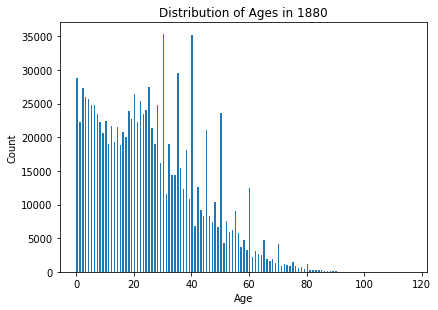

In [64]:
#Age -- treat age as continuous
plt.hist(census_1880["CENSUS_AGE"], bins = "auto")
plt.tight_layout()
plt.title("Distribution of Ages in 1880")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

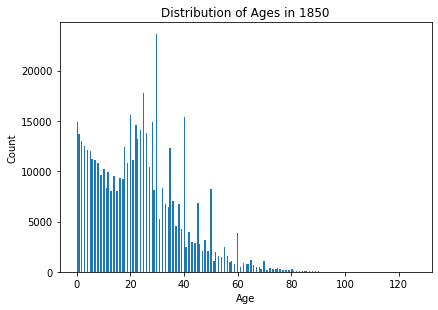

In [63]:
plt.hist(census_1850["CENSUS_AGE"], bins = "auto")
plt.tight_layout()
plt.title("Distribution of Ages in 1850")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

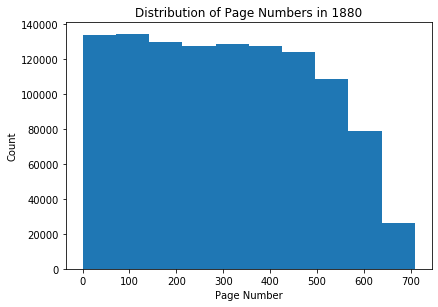

In [66]:
#page number -- for now continuous, may make sense to segment it
#somehow -- by ward & then every ten pages or something & make it ordinal
plt.hist(census_1880["CENSUS_PAGENUM"])
plt.tight_layout()
plt.title("Distribution of Page Numbers in 1880")
plt.xlabel("Page Number")
plt.ylabel("Count")
plt.show()